In [11]:
import matplotlib.pyplot as plt
import cv2
from random import sample
import numpy as np
np.random.seed(1)

### Image Preview and Reading

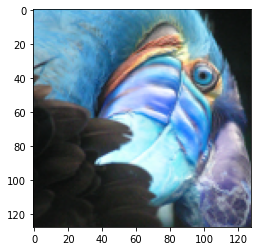

In [12]:
img = cv2.imread('input.png')
height, width, channels = np.shape(img)
X = img.reshape(height * width, 3)

original_img = plt.imshow(img)
plt.show()

### Initialize Distance, Cluster, & Centroid Lists

In [13]:
K = 10
iterations = 30

distances = []
clusters = []
for i in range(K):
    distances.append(0)
    clusters.append([])


centroids = sample(list(X), K)

### Clustering Pixels Into K Most Common Colors

In [14]:
for iter in range(iterations):
    
    for i in range(width):
        for j in range(height):
            pixel = img[j][i] 
            
            for k in range(K):
                distances[k] = np.linalg.norm(centroids[k] - pixel)
            
            # assigns pixel to the closest cluster
            dist_min = np.min(distances)
            dist_min_index = distances.index(dist_min)
            clusters[dist_min_index].append(pixel)
            
    # sets the new centroid value equal to the mean its cluster
    for i in range(K):
        centroids[i] = np.mean(np.array(clusters[i]), axis=0)

### Assigning Similar Colors

In [15]:
for i in range(width):
    for j in range(height):
            pixel = img[j][i]

            for k in range(K):
                distances[k] = np.linalg.norm(centroids[k] - pixel)
            
            # assigns the new centroid mean value to each pixel
            dist_min = np.min(distances)
            dist_min_index = distances.index(dist_min)
            img[j][i] = centroids[dist_min_index]

### Preview Compressed Image & Save Result

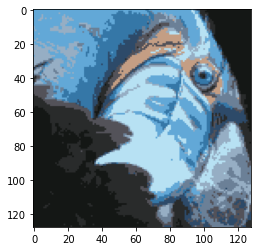

True

In [16]:
compressed_img = plt.imshow(img)
plt.show()

cv2.imwrite('compressed.png', img)